In [1]:
abspath = '/Users/paolamartire/shocks/'
import sys
sys.path.append(abspath)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Utilities.basic_units import radians
from src.Den import DENorbits as orb
from Utilities import sections as sec

from Utilities.operators import make_tree, to_cylindric, Ryan_sampler, find_step, single_branch
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

<Figure size 2400x1800 with 0 Axes>

In [ ]:
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
check = '' # '' or 'HiRes' or 'Res20'
check1 = 'HiRes' 
check2 = 'Res20'
compton = 'Compton'

folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}'

snap = '164'
snap2 = '169'
snapL = '164'
path = f'{abspath}TDE/{folder}{check}/{snap}'
path1 = f'{abspath}TDE/{folder}{check1}/{snap}'
path2 = f'{abspath}TDE/{folder}{check2}/{snap2}'
#saving_path = f'Figs/{folder}/{check}'
#print(f'We are in: {path}, \nWe save in: {saving_path}')
threshold=1/3

Rt = Rstar * (Mbh/mstar)**(1/3)
Rp =  Rt / beta
R0 = 0.6 * Rp
apo = orb.apocentre(Rstar, mstar, Mbh, beta)
params = [Mbh, Rstar, mstar, beta]

G_SI = 6.6743e-11
Msol = 2e30 #1.98847e30 # kg
Rsol = 7e8 #6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G_SI ))
c = 3e8 / (7e8/t)

Rs = 2*G*Mbh / c**2

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)

theta_lim = np.pi#3*np.pi/4
step = 0.02
theta_init = np.arange(-theta_lim, theta_lim, step)
theta_arr = Ryan_sampler(theta_init)

Load data

In [5]:
data = make_tree(path, snap, energy = False)
THETA, RADIUS_cyl = to_cylindric(data.X, data.Y)
dim_cell = data.Vol**(1/3) 

tfb = days_since_distruption(f'{path1}/snap_{snap}.h5', m, mstar, Rstar, choose = 'tfb')

# div = np.load(f'{folder}/{snap}/DivV_{snap}.npy')
# shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
# shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]
# y_surf = y_zone[idx_surf]
# z_surf = z_zone[idx_surf]
# Vx_surf = Vx_zone[idx_surf]
# Vy_surf = Vy_zone[idx_surf]
# dim_cell_surf = dim_cell_zone[idx_surf]
# div_surf = div_zone[idx_surf]

# density = np.load(f'TDE/{folder}{check}/{snap}/smoothed_Den_{snap}.npy') 
midplane = np.abs(data.Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, THETA_midplane, dim_midplane, Mass_midplane, Den_midplane, = \
    sec.make_slices([data.X, data.Y, data.Z, THETA, dim_cell, data.Mass, data.Den], midplane)

days after disruption: 1.344488293275381 // t_fall: 2.5777261297507925 // sim_time: 72.92898108781884


(-50.0, 50.0)

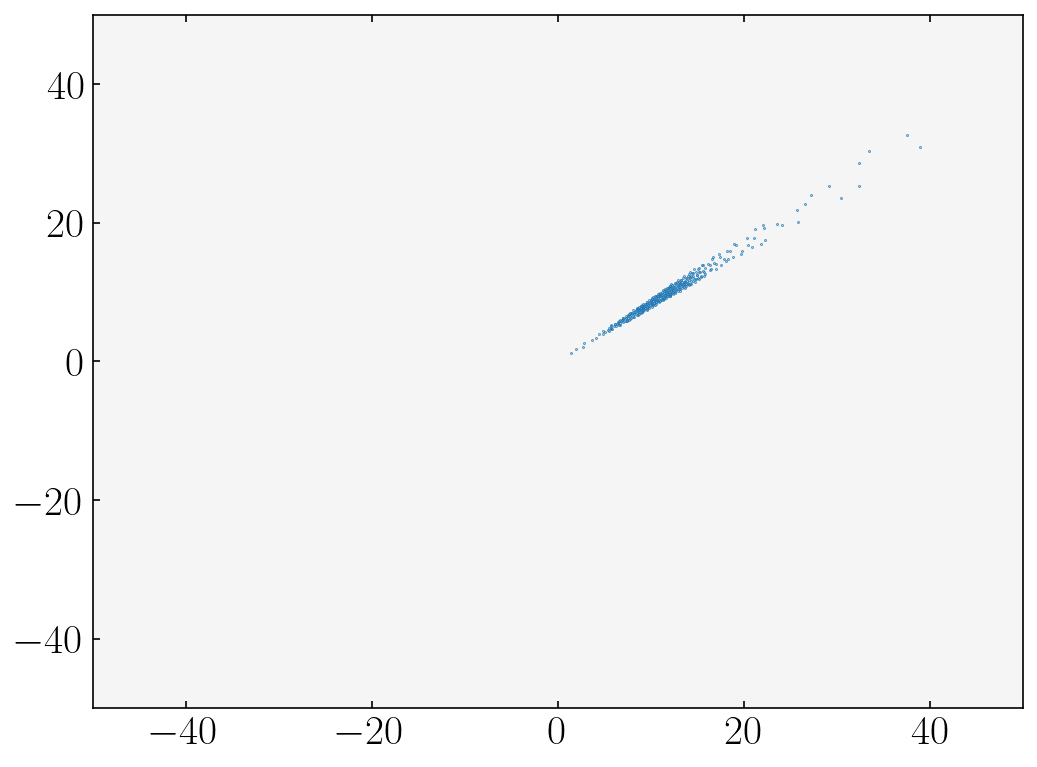

In [7]:
# Test angle selection
# xaxis = 'angles'
# angles = np.arange(-np.pi, np.pi, 0.02)
# angles = Ryan_sampler(angles)
# # den_cast, indices_angles = single_branch(angles, THETA, data.Den, weights = data.Mass, keep_track = True)
# den_cast, indices_angles = single_branch(angles, xaxis, THETA_midplane, Den_midplane, weights = Mass_midplane, keep_track = True)
# i = 140
# # plt.scatter(data.X[indices_angles[i]], data.Y[indices_angles[i]], s = 0.1)
# plt.scatter(X_midplane[indices_angles[i]], Y_midplane[indices_angles[i]], s = 0.1)
# plt.xlim(-50,50)
# plt.ylim(-50,50)

In [5]:
# idx = 120
# theta_chosen = theta_arr[idx]
# streamLow = np.load(f'data/{folder}/stream_{check}{snap}_{step}.npy')
# theta_arr, indeces_orbit = streamLow[0], streamLow[1].astype(int)
# x_orbit, y_orbit, z_orbit, dim_orbit = data.X[indeces_orbit], data.Y[indeces_orbit], data.Z[indeces_orbit], dim_cell[indeces_orbit]
# x_chosen, y_chosen, z_chosen = x_orbit[idx], y_orbit[idx], z_orbit[idx]
# streamL = np.load(f'data/{folder}/stream_Low{snapL}_{step}.npy')
# indeces_orbitL = streamL[1].astype(int)
# DenL = np.load(f'TDE/{folder}Low/{snapL}/smoothed_Den_{snapL}.npy')
# stream_thresh = DenL[indeces_orbitL]/3

# condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, idx, coord= True)
# X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
#     sec.make_slices([data.X, data.Y, data.Z, density, RADIUS_cyl], condition_tra)
# X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
# Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
# x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
# indeces_boundary, x_T_width, w_params, h_params = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, density, indeces_orbit, idx, stream_thresh[idx])

# plt.figure(figsize=(6,4))
# img = plt.scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'viridis', vmin = 0, vmax = 2e-8)
# plt.scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'k')
# cbar = plt.colorbar(img)
# cbar.set_label(r' Density', fontsize = 16)
# plt.xlim(-20,20)
# plt.ylim(-20,20)
# plt.ylabel(r'Y [$R_\odot$]', fontsize = 18)
# plt.title(f'theta: {theta_chosen:.2f}', fontsize = 18)

In [6]:
data1 = make_tree(path1, snap, energy = False)
data2 = make_tree(path2, snap2, energy = False)

THETA1, RADIUS_cyl1 = to_cylindric(data1.X, data1.Y)
THETA2, RADIUS_cyl2 = to_cylindric(data2.X, data2.Y)

dim_cell1 = data1.Vol**(1/3) 
dim_cell2 = data2.Vol**(1/3) 

In [7]:
# density1 = np.load(f'TDE/{folder}{check1}/{snap}/smoothed_Den_{snap}.npy') 
# density2 = np.load(f'TDE/{folder}{check2}/{snap2}/smoothed_Den_{snap2}.npy') 

Midplane 

In [8]:
midplane1 = np.abs(data1.Z) < dim_cell1
X_midplane1, Y_midplane1, Z_midplane1, dim_midplane1, Mass_midplane1, Den_midplane1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, dim_cell1, data1.Mass, data1.Den], midplane1)

midplane2 = np.abs(data2.Z) < dim_cell2
X_midplane2, Y_midplane2, Z_midplane2, dim_midplane2, Mass_midplane2, Den_midplane2 = \
    sec.make_slices([data2.X, data2.Y, data2.Z, dim_cell2, data2.Mass, data2.Den], midplane2)

Tangent and transverse plane

In [ ]:
# check if the file with the data exist and load it
try:
    streamLow = np.load(f'data/{folder}/DENstream_{check}{snap}.npy')
    theta_arr, x_stream, y_stream, z_stream = streamLow[0], streamLow[1], streamLow[2], streamLow[3]
    streamMiddle = np.load(f'data/{folder}/DENstream_{check1}{snap}.npy')
    x_stream1, y_stream1, z_stream1 = streamMiddle[1], streamMiddle[2], streamMiddle[3]
    print('Loading data')
    # streamRes20 = np.load(f'data/{folder}/DENstream_{check2}{snap2}.npy')
    # indeces_orbit2 = streamRes20[1].astype(int)
# otherwise compute it
except:
    print('Computing data')
    indeces_orbit = orb.find_transverse_maximum(data.X, data.Y, data.Z, dim_cell, data.Den, theta_arr, Rt)
    np.save(f'data/{folder}/stream_{check}{snap}_{step}', [theta_arr, indeces_orbit])
    print('Low done')
    indeces_orbit1 = orb.find_transverse_maximum(data1.X, data1.Y, data1.Z, dim_cell1, data1.Den, theta_arr, Rt)
    np.save(f'data/{folder}/stream_{check1}{snap}_{step}', [theta_arr, indeces_orbit1])
    print('HiRes done')
    indeces_orbit2 = orb.find_transverse_maximum(data2.X, data2.Y, data2.Z, dim_cell2, data2.Den, theta_arr, Rt)
    np.save(f'data/{folder}/stream_{check2}{snap2}_{step}', [theta_arr, indeces_orbit2])

In [ ]:
plt.plot(x_stream[:230], y_stream[:230], label = 'Low')
plt.plot(x_stream1[:230], y_stream1[:230], '--', label = 'HiRes')
# plt.plot(x_stream2[30:230], y_stream2[30:230], label = 'Res20')
plt.xlim(-300,30)
plt.ylim(-80,80)
plt.legend()
plt.grid()

In [ ]:
# check velocity vector and tangential vector (BonnerotLu22)
tree_low = data.sim_tree
indeces = [20,50,100,200]
indeces_tree = np.zeros(len(indeces))
velx100, vely100 = np.zeros(len(indeces)), np.zeros(len(indeces))
for i,elem in enumerate(indeces):
    _, idx = tree_low.query([x_stream[elem], y_stream[elem], z_stream[elem]])
    velx100[i], vely100[i] = data.VX[idx], data.VY[idx]
    indeces_tree[i] = idx
indeces_tree = np.array(indeces_tree).astype(int)

plt.plot(x_stream[:230], y_stream[:230], c = 'orange')
plt.scatter(data.X[indeces_tree], data.Y[indeces_tree], c = 'r', s = 10)
plt.quiver(data.X[indeces_tree[0:2]], data.Y[indeces_tree[0:2]], velx100[0:2], vely100[0:2], color = 'k', angles='xy', scale_units='xy', width = 3e-3, scale= .2)
plt.quiver(data.X[indeces_tree[2:]], data.Y[indeces_tree[2:]], velx100[2:], vely100[2:], color = 'k', angles='xy', scale_units='xy', width = 3e-3, scale= 1)
plt.xlim(-300,30)
plt.ylim(-80,80)
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend()
plt.grid()

In [ ]:
# check how orbits change in interation
orbs = np.load(f'/Users/paolamartire/shocks/data/{folder}/COMPAREstream_{check}{snap}.npy')
x_stream_rad, y_stream_rad, z_stream_rad, x_cmTR, y_cmTR, z_cmTR, x_cm, y_cm, z_cm = orbs[0], orbs[1], orbs[2], orbs[3], orbs[4], orbs[5], orbs[6], orbs[7], orbs[8]
plt.plot(x_stream_rad, y_stream_rad, c = 'k', label = 'Rad maxima')
plt.plot(x_cmTR, y_cmTR, c = 'deepskyblue', label = 'CM 1st iteration')
plt.plot(x_cm, y_cm, '--', c = 'coral', label = 'CM 2nd iteration')
plt.xlim(-300,30)
plt.ylim(-60,60)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()

In [ ]:
idx = 100#np.argmin(np.abs(theta_arr+7*np.pi/8))
theta_chosen = theta_arr[idx]
x_chosen, y_chosen, z_chosen = x_stream[idx], y_stream[idx], z_stream[idx]
x_chosen1, y_chosen1, z_chosen1 = x_stream1[idx], y_stream1[idx], z_stream1[idx]
# x_chosen2, y_chosen2, z_chosen2 = x_stream2[idx], y_stream2[idx], z_stream2[idx]

condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, data.Z, dim_cell, x_stream, y_stream, z_stream, idx, coord= True)
X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
    sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
indeces_boundary, x_T_width, w_params, h_params, den_thresh = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, data.Den, data.Mass, streamLow, idx, params)

# do the same for data1
condition_tra1, x_onplane1, x01 = sec.transverse_plane(data1.X, data1.Y, data1.Z, dim_cell1, x_stream1, y_stream1, z_stream1, idx, coord= True)
X_tra1, Y_tra1, Z_tra1, Den_tra1, RADIUS_cyl_tra1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, data1.Den, RADIUS_cyl1], condition_tra1)
X_tra_midplane1 = X_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
Y_tra_midplane1 = Y_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
x_onplane_midplane1 = x_onplane1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
indeces_boundary1, x_T_width1, w_params1, h_params1, den_thresh1 = orb.find_single_boundaries(data1.X, data1.Y, data1.Z, dim_cell1, data1.Den, data1.Mass, streamMiddle, idx, params)

# do the same for data2
# condition_tra2, x_onplane2, x02 = sec.transverse_plane(data2.X, data2.Y, dim_cell2 ,x_stream2, y_stream2, idx, coord= True)
# X_tra2, Y_tra2, Z_tra2, Den_tra2, RADIUS_cyl_tra2 = \
#     sec.make_slices([data2.X, data2.Y, data2.Z, data2.Den, RADIUS_cyl2], condition_tra2)
# X_tra_midplane2 = X_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
# Y_tra_midplane2 = Y_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
# x_onplane_midplane2 = x_onplane2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
# indeces_boundary2, x_T_width2, w_params2, h_params2, den_thresh2 = orb.find_single_boundaries(data2.X, data2.Y, data2.Z, dim_cell2, data2.Den, data2.Mass, stream, idx, params)

# Things for pretty plots
vmaxrho_xy = 4e-8
vminrho_xy = 1/3 * vmaxrho_xy 
# vminrho2 = 1/3 * vmaxrho2   
indeces_low, indeces_up, indeces_low_h, indeces_up_h = indeces_boundary[0], indeces_boundary[1], indeces_boundary[2], indeces_boundary[3]
indeces_low1, indeces_up1, indeces_low_h1, indeces_up_h1 = indeces_boundary1[0], indeces_boundary1[1], indeces_boundary1[2], indeces_boundary1[3]
# indeces_low2, indeces_up2, indeces_low_h2, indeces_up_h2 = indeces_boundary2[0], indeces_boundary2[1], indeces_boundary2[2], indeces_boundary2[3]
xlim_neg = np.min([x_T_width[0], x_T_width1[0]]) - 0.2
xlim = np.max([x_T_width[1], x_T_width1[1]]) + 0.2
ylim_neg = np.min([data.Z[indeces_low_h], data1.Z[indeces_low_h1]]) - 0.2    
ylim = np.max([data.Z[indeces_up_h], data1.Z[indeces_up_h1]]) + 0.2
# Plotting
fig, ax = plt.subplots(3,2, figsize = (12,8))
img = ax[0][0].scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'cividis', vmin = vminrho_xy, vmax = vmaxrho_xy)
cbar = plt.colorbar(img, location = 'bottom')
cbar.set_label(r' Density', fontsize = 16)
ax[0][0].plot(x_stream[20:230], y_stream[20:230], c = 'k')
ax[0][0].scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'white')
ax[0][0].scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'b')
ax[0][0].set_xlim(-300,30)
ax[0][0].set_ylim(-75,75)
ax[0][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[0][1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 27)
cbar1 = plt.colorbar(img1)
cbar1.set_label(r' Density', fontsize = 16)
# contour = ax[0][1].tricontour(x_onplane, Z_tra, Den_tra, levels=[vmaxrho/3], linewidths=2, colors='red')
# ax[0][1].clabel(contour, inline=True, fontsize=8, fmt = '%.1e')
ax[0][1].scatter(0, z_stream[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
ax[0][1].axvline(x_T_width[0], c = 'k', alpha = 0.5)
ax[0][1].axvline(x_T_width[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[0][1].axhline(data.Z[indeces_low_h], c = 'k', alpha = 0.5)
ax[0][1].axhline(data.Z[indeces_up_h], c = 'k', alpha = 0.5)
ax[0][1].set_xlim(xlim_neg, xlim)
ax[0][1].set_ylim(ylim_neg, ylim)
ax[0][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[0][0].set_title(f'{check}, cells W: {int(w_params[1])}, cells H: {int(h_params[1])}', fontsize = 12)

## HiRes
img = ax[1][0].scatter(X_midplane1, Y_midplane1, c = Den_midplane1, s = .1, cmap = 'cividis', vmin = vminrho_xy, vmax = vmaxrho_xy)
ax[1][0].plot(x_stream1[20:230], y_stream1[20:230], c = 'k')
# ax[1][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[1][0].scatter(X_tra_midplane1, Y_tra_midplane1, s = 0.1, c = 'white')
ax[1][0].scatter(x_chosen1, y_chosen1, marker = 'x', s = 27, c = 'b')
ax[1][0].set_xlim(-300,30)
ax[1][0].set_ylim(-75,75)
ax[1][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
ax[1][0].set_title(f'Middle, cells W: {int(w_params1[1])}, cells H: {int(h_params1[1])}', fontsize = 12)

img1 = ax[1][1].scatter(x_onplane1, Z_tra1, c = Den_tra1,  cmap = 'viridis', s = 27)
cbar1 = plt.colorbar(img1)
cbar1.set_label(r' Density', fontsize = 16)
# contour = ax[1][1].tricontour(x_onplane1, Z_tra1, Den_tra1, levels=[vmaxrho1/3], linewidths=2, colors='red')
# ax[1][1].clabel(contour, inline=True, fontsize=18, fmt = '%.1e', colors = 'r')
ax[1][1].scatter(0, z_stream1[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
ax[1][1].axvline(x_T_width1[0], c = 'k', alpha = 0.5)
ax[1][1].axvline(x_T_width1[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[1][1].axhline(data1.Z[indeces_low_h1], c = 'k', alpha = 0.5)
ax[1][1].axhline(data1.Z[indeces_up_h1], c = 'k', alpha = 0.5)
ax[1][1].set_xlim(xlim_neg, xlim)
ax[1][1].set_ylim(ylim_neg, ylim)
ax[1][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)

## Res20
# img = ax[2][0].scatter(X_midplane2, Y_midplane2, c = Den_midplane2, s = .1, cmap = 'cividis', vmin = vminrho_xy, vmax = vmaxrho_xy)
# ax[2][0].plot(x_stream2[30:230], y_stream2[30:230], c = 'k')
# # ax[2][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
# ax[2][0].scatter(X_tra_midplane2, Y_tra_midplane2, s = 0.1, c = 'white')
# ax[2][0].scatter(x_chosen2, y_chosen2, marker = 'x', s = 27, c = 'b')
# ax[2][0].set_xlim(-300,30)
# ax[2][0].set_ylim(-75,75)
# ax[2][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax[2][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

# img1 = ax[2][1].scatter(x_onplane2, Z_tra2, c = Den_tra2,  cmap = 'viridis', s = 27, vmin = vminrho2, vmax = vmaxrho2)
# cbar1 = plt.colorbar(img1)
# cbar1.set_label(r' Density', fontsize = 16)
# contour = ax[2][1].tricontour(x_onplane2, Z_tra2, Den_tra2, levels=[vmaxrho2/3], linewidths=2, colors='red')
# ax[2][1].clabel(contour, inline=True, fontsize=8, fmt = '%.1e')
# ax[2][1].scatter(0, z_stream2[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
# ax[2][1].axvline(x_T_width2[0], c = 'k', alpha = 0.5)
# ax[2][1].axvline(x_T_width2[1], c = 'k', alpha = 0.5) # T coordinates for width
# ax[2][1].axhline(data2.Z[indeces_low_h2], c = 'k', alpha = 0.5)
# ax[2][1].axhline(data2.Z[indeces_up_h2], c = 'k', alpha = 0.5)
# ax[2][1].set_xlim(xlim_neg, xlim) # T coordinates for width
# ax[2][1].set_ylim(ylim_neg, ylim)
# ax[2][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
# ax[2][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
# ax[2][0].set_title(f'High, cells W: {int(w_params2[1])}, cells H: {int(h_params2[1])}', fontsize = 12)

plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,1)), fontsize = 16)
plt.tight_layout()

# plt.savefig(f'Figs/{folder}/multiple/wH{idx}.png')